## 구글 안드로이드 앱 스토어 분석 
- Plotly를 통해, 안드로이드 앱스토어 데이터의 데이터 시각화를 고급지게 꾸며보자! 

<img src="data/app_store.png">

- 자기만의 iOS나 안드로이드 앱을 만드는 것을 생각해본적이 있는가? 만약 그렇다면 앱스토어에서 이것들이 어떻게 작동하는지에 대해서도 궁금해 했을 것이다.
- 이번 시간에는 "**Annie**" 나 "**Sensor Tower**"와 같은 회사에서 제공하는 앱스토어 분석 중 일부를 가져와, 많은 회사에서 사용하는 개발이나 앱 마케팅 전략에 대해 살펴보고자 한다. 
- 이번 시간에서는, 구글 플레이 스토어의 수천 개의 앱을 비교하여 아래와 같은 통찰을 얻을 수 있다.
    - 다양한 앱 범주(게임, 라이프스타일, 날씨 등)가 얼마나 경쟁력이 있는가?
    - 어떤 앱 범주가 인기에 따라 흥미있는 기회를 제공하는가?
    - 무료 앱에 비해 유료앱은 얼마나 많은 다운로드 횟수를 포기해야 하는가?
    - 유료 앱에 합리적인 금액은 얼마인가?
    - 가장 높은 매출을 올린 유로앱은 무엇인가?
    - 판매 수익에 기반하여, 개발 비용을 회수하는 유료 앱의 수는 얼마나 되는가? 

- 또한 위의 통찰을 얻음과 동시에 아래의 사항을 배울 수 있다. 
    - 중복 항목을 빠르게 제거하는 방법 
    - 원하지 않는 기호를 제거하고, 데이터를 숫자 형식으로 변경하는 방법 
    - Pandas를 통해, 중첩된 데이터가 있는 열을 처리하는 방법 
    - Plotly 라이브러리로 매력적인 데이터 시각화 만드는 방법
    - 수직, 수평, 그룹화된 막대 차트 생성
    - 범주형 데이터 대한 파이 차트, 도넛 차트 생성 
    - 색상 눈금을 이용해 보기 좋은 산점도 생성

### 1. 데이터 정제: NaN값과 중복값 제거 

In [1]:
# 필요한 모듈 임포트 
import pandas as pd 
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings('ignore')

#### 1-1. 데이터 살펴보기 

In [2]:
# app.csv 파일 불러오기 및 데이터 출력 
df_app_store = pd.read_csv('data/apps.csv')
print(df_app_store.shape)
df_app_store.head()

(10841, 12)


,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Android_Ver
0,Ak Parti Yardım Toplama,SOCIAL,NaN,0,8.7,0,Paid,$13.99,Teen,Social,"July 28, 2017",4.1 and up
1,Ain Arabic Kids Alif Ba ta,FAMILY,NaN,0,33.0,0,Paid,$2.99,Everyone,Education,"April 15, 2016",3.0 and up
2,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,NaN,0,5.5,0,Paid,$1.49,Everyone,Personalization,"July 11, 2018",4.2 and up
3,Command & Conquer: Rivals,FAMILY,NaN,0,19.0,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device
4,CX Network,BUSINESS,NaN,0,10.0,0,Free,0,Everyone,Business,"August 6, 2018",4.1 and up


- "apps.csv"의 데이터 수는 10,841개의 행과 12개의 컬럼으로 구성되어 있다. 
- 컬럼의 의미는 아래와 같다. 
    - App: App Store에 있는 App 이름 
    - Category: 해당 App의 카테고리 
    - Rating: 해당 App의 평점 (5.0점이 만점)
    - Reviews: 해당 App의 리뷰 개수 
    - Size_MBs: 해당 App의 설치 용량 (단위: MBs)
    - Installs: 해당 App의 다운로드, 설치 수
    - Type: 해당 App의 타입 - 유료앱: Paid / 무료앱: Free
    - Price: 해당 App의 가격 (단위 `$`) - 유료앱: 가격 있음 / 무료앱: 0
    - Content_Rating: 해당 App의 이용 등급 
    - Genres: 해당 App의 장르
    - Last_Updated: 해당 App의 마지막 업데이트 일시 
    - Android_Ver: 해당 App 설치시 안드로이드 버전 조건
- 여기서 우리는 몇 가지의 데이터 전처리가 필요하다는 것을 확인할 수 있다. 
    - 필요없는 컬럼 제거
    - NaN 값 해결 - Rating, Type
    - Price 컬럼에 달러 표시가 된 것으로 보아 str일 것으로 예상 해당 컬럼 int로 변환

In [3]:
# 임의의 5개 표본 데이터 확인
df_app_store.sample(5)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Android_Ver
1953,Next Launcher 3D Bold-CF Theme,PERSONALIZATION,4.4,175,5.5,"1,000",Paid,$0.99,Everyone,Personalization,"January 11, 2014",2.2 and up
8542,"Shrimp skin shopping: spend less, buy better",SHOPPING,4.2,106798,30.0,"5,000,000",Free,0,Everyone,Shopping,"July 23, 2018",4.1 and up
7752,The Emirates App,TRAVEL_AND_LOCAL,4.4,22748,55.0,"1,000,000",Free,0,Everyone,Travel & Local,"August 6, 2018",5.0 and up
950,EO Hotels,TRAVEL_AND_LOCAL,NaN,4,11.0,100,Free,0,Everyone,Travel & Local,"June 4, 2017",4.0.3 and up
2781,Chess and Mate,FAMILY,4.5,359,17.0,"5,000",Paid,$4.99,Everyone,Board;Brain Games,"August 12, 2015",2.3 and up


- ".sample(n)"은 임의의 n개 행을 반환 한다. 이것은 우리가 데이터프레임을 검사하는 편리한 방법 중 하나이다.

#### 1-2. 데이터 전처리 1 - 불필요한 컬럼 및 NaN값 제거

In [4]:
# 필요없는 Last_Updated와 Android_Ver 컬럼 삭제 
df_app_store = df_app_store.drop(['Last_Updated', 'Android_Ver'], axis=1)
df_app_store.head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
0,Ak Parti Yardım Toplama,SOCIAL,NaN,0,8.7,0,Paid,$13.99,Teen,Social
1,Ain Arabic Kids Alif Ba ta,FAMILY,NaN,0,33.0,0,Paid,$2.99,Everyone,Education
2,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,NaN,0,5.5,0,Paid,$1.49,Everyone,Personalization
3,Command & Conquer: Rivals,FAMILY,NaN,0,19.0,0,NaN,0,Everyone 10+,Strategy
4,CX Network,BUSINESS,NaN,0,10.0,0,Free,0,Everyone,Business


- 먼저 원하지 않는 컬럼을 제거하려면 ".drop()" 메소드에 제거하려는 컬럼 이름을 전달하면 된다. (여기서는 'Last_Updated'와 'Android_Ver'이다.)
- 또한 "axis=1"을 설정해서 특정 열을 삭제하도록 하면 된다.

In [5]:
# 사용하지 않는 NaN값 제거 - NaN 값 확인
df_app_store.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size_MBs             0
Installs             0
Type                 1
Price                0
Content_Rating       0
Genres               0
dtype: int64

In [6]:
# Rating 컬럼 기준 NaN 값 확인
nan_row = df_app_store[df_app_store.Rating.isna()]
print(nan_row.shape)
nan_row.head()

(1474, 10)


,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
0,Ak Parti Yardım Toplama,SOCIAL,NaN,0,8.7,0,Paid,$13.99,Teen,Social
1,Ain Arabic Kids Alif Ba ta,FAMILY,NaN,0,33.0,0,Paid,$2.99,Everyone,Education
2,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,NaN,0,5.5,0,Paid,$1.49,Everyone,Personalization
3,Command & Conquer: Rivals,FAMILY,NaN,0,19.0,0,NaN,0,Everyone 10+,Strategy
4,CX Network,BUSINESS,NaN,0,10.0,0,Free,0,Everyone,Business


In [7]:
# NaN 값 제거 
df_apps_clean = df_app_store.dropna()
df_apps_clean

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.0,4,25.0,1,Free,0,Everyone,Medical
28,Ra Ga Ba,GAME,5.0,2,20.0,1,Paid,$1.49,Everyone,Arcade
47,Mu.F.O.,GAME,5.0,2,16.0,1,Paid,$0.99,Everyone,Arcade
82,Brick Breaker BR,GAME,5.0,7,19.0,5,Free,0,Everyone,Arcade
99,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5.0,1,4.6,5,Free,0,Everyone,Medical
...,...,...,...,...,...,...,...,...,...,...
10836,Subway Surfers,GAME,4.5,27723193,76.0,"1,000,000,000",Free,0,Everyone 10+,Arcade
10837,Subway Surfers,GAME,4.5,27724094,76.0,"1,000,000,000",Free,0,Everyone 10+,Arcade
10838,Subway Surfers,GAME,4.5,27725352,76.0,"1,000,000,000",Free,0,Everyone 10+,Arcade
10839,Subway Surfers,GAME,4.5,27725352,76.0,"1,000,000,000",Free,0,Everyone 10+,Arcade


- NaN 값이 있는 행을 찾아서 제거하기 위해 ".isna()"의 값이 "True"인 위치에 대한 데이터프레임의 하위 집합을 만들 수 있다.
- Rating 열의 NaN 값이 리뷰가 없는 곳과 연관되어 있는 것을 알 수 있다.
- 찾은 NaN 값이 불필요한 데이터 이므로 우선 NaN 값을 제거하였다. 삭제후 데이터의 수는 "9,367개의 행"과 "10개의 컬럼으로 바뀌었다.

#### 1-2. 중복된 데이터 제거 

In [8]:
# 중복 데이터 개수 확인 
df_apps_clean.duplicated().sum()

476

In [9]:
# 중복된 항목 출력
duplicated_rows = df_apps_clean[df_apps_clean.duplicated]
print(duplicated_rows.shape)
duplicated_rows.head()

(476, 10)


,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
946,420 BZ Budeze Delivery,MEDICAL,5.0,2,11.0,100,Free,0,Mature 17+,Medical
1133,MouseMingle,DATING,2.7,3,3.9,100,Free,0,Mature 17+,Dating
1196,"Cardiac diagnosis (heart rate, arrhythmia)",MEDICAL,4.4,8,6.5,100,Paid,$12.99,Everyone,Medical
1231,Sway Medical,MEDICAL,5.0,3,22.0,100,Free,0,Everyone,Medical
1247,Chat Kids - Chat Room For Kids,DATING,4.7,6,4.9,100,Free,0,Mature 17+,Dating


In [10]:
# 중복된 데이터 App 컬럼을 기준으로 필터링 - Instagram
df_apps_clean[df_apps_clean.App == "Instagram"]

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10806,Instagram,SOCIAL,4.5,66577313,5.3,"1,000,000,000",Free,0,Teen,Social
10808,Instagram,SOCIAL,4.5,66577446,5.3,"1,000,000,000",Free,0,Teen,Social
10809,Instagram,SOCIAL,4.5,66577313,5.3,"1,000,000,000",Free,0,Teen,Social
10810,Instagram,SOCIAL,4.5,66509917,5.3,"1,000,000,000",Free,0,Teen,Social


In [11]:
# 중복된 데이터 제거 - 주의, 중복된 데이터 제거시 중복 항목을 식별할 수 있는 방법을 명시해야 함(컬럼 명 명시)
df_apps_clean = df_apps_clean.drop_duplicates(subset=['App', 'Type', 'Price'], ignore_index=True)
df_apps_clean

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
0,KBA-EZ Health Guide,MEDICAL,5.0,4,25.00,1,Free,0,Everyone,Medical
1,Ra Ga Ba,GAME,5.0,2,20.00,1,Paid,$1.49,Everyone,Arcade
2,Mu.F.O.,GAME,5.0,2,16.00,1,Paid,$0.99,Everyone,Arcade
3,Brick Breaker BR,GAME,5.0,7,19.00,5,Free,0,Everyone,Arcade
4,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5.0,1,4.60,5,Free,0,Everyone,Medical
...,...,...,...,...,...,...,...,...,...,...
8194,Google Drive,PRODUCTIVITY,4.4,2731171,4.00,"1,000,000,000",Free,0,Everyone,Productivity
8195,YouTube,VIDEO_PLAYERS,4.3,25655305,4.65,"1,000,000,000",Free,0,Teen,Video Players & Editors
8196,Google Play Movies & TV,VIDEO_PLAYERS,3.7,906384,4.65,"1,000,000,000",Free,0,Teen,Video Players & Editors
8197,Google News,NEWS_AND_MAGAZINES,3.9,877635,13.00,"1,000,000,000",Free,0,Teen,News & Magazines


In [12]:
# 중복 제거 후 필터링한 "Instagram" 확인
df_apps_clean[df_apps_clean.App == "Instagram"]

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
8188,Instagram,SOCIAL,4.5,66577313,5.3,"1,000,000,000",Free,0,Teen,Social


- 현재 1차 전처리된 데이터에는 중복 항목이 있는 것이 발견되었다. 중복된 데이터의 개수는 모두 476개였다. (".duplicated()" 함수 사용)
- App 컬럼에 "Instagram"을 필터링 해보면 "Instagram"의 데이터가 여러개 있는 것을 알 수 있다. 
- 중복값 제거를 위해 ".drop_duplicates()" 함수를 사용할 것이다. 여기서 주의해야 할 점은 중복 항목을 식별할 수 있는 방법을 명시하지 않으면, 중복 제거가 제대로 되지 않는다. 
- 중복 항목을 식별하기 위해, 비교해야 할 열 이름을 제공해준다. (.drop_duplicates()안에 매개변수 "subset"을 이용하여 컬럼을 지정해주는데, 여기서는 'App', 'Type', 'Price' 컬럼이다.)
- 그리고 중복값이 제거되면 해당 행의 데이터는 제거가 되어 제거된 행의 index가 비게된다. 이때 "ignore_index=True"라고 설정해주면, index를 재배열 해준다.
- 제거 완료 후 데이터의 개수는 "8,199개의 행", "10개의 컬럼"으로 전처리 되었다. 

#### 1-3. 데이터에 대해 알아야 할 추가사항
- 이제 13개의 다른 기능들이 구글 플레이 스토어에서 스크랩되었다는 것을 알게 되었다. 
- 명백하게도, 이 데이터들은 모든 안드로이드 앱 중 샘플에 불과하다(수백만 개의 안드로이드 앱을 모두 포함하고 있지는 않는다).
- 샘플은 앱 스토어 전체를 대표하는 샘플이라고 가정한다. 웹 스크랩 처리 중에, 해당 샘플은 스크랩한 사람의 지리적인 위치(여기서는 Lavanya Gupta 위치의 사용자 사용)와 사용자의 행동에 의해 제공되었기 때문에 이게 전부다 그런 것은 아니다.
- 데이터는 2017/2018년 경에 작성되었으며, 금액 데이터는 스크래핑 당시의 가격을 USD로 반영한 것이다. (개발자는 프로모션을 제공할 수 있고, 앱의 가격을 변경할 수 있다)
- 앱의 크기는 MB 단위의 부동 소수점 형태로 변환했다. 데이터가 없다면, 해당 범주의 평균 크기로 대체했다.
- 설치 횟수는 정확하지 않다. 245,239회의 설치 횟수를 보였다면 구글은 이를 단순히 100,000회 이상으로 보고할 것이다. + 기호는 제거했으며, 단순화를 위해 해당 열에 정확한 설치 수를 가정하였다.
- 위 내용들은 구글플레이스토어의 목록으로 이동할 때 안드로이드 앱 목록에 표시되는 내용이다. 아래의 이미지를 참고하자.

<img src = "data/sample.png">

### 2. 예비 탐색: 최고 평점, 가장 많은 리뷰, 가장 큰 크기의 앱 찾아보기 

In [13]:
# 통계적 자료 
df_apps_clean.describe()

,Rating,Reviews,Size_MBs
count,8199.000000,8.199000e+03,8199.000000
mean,4.172899,2.550730e+05,20.086014
std,0.537124,1.985241e+06,21.653660
min,1.000000,1.000000e+00,0.008301
25%,4.000000,1.260000e+02,4.900000
50%,4.300000,2.992000e+03,11.000000
75%,4.500000,4.361250e+04,28.000000
max,5.000000,7.815831e+07,100.000000


In [14]:
# 가장 높은 평가를 받은 앱 기준 필터링
# df_apps_clean[df_apps_clean.Rating == 5.0]
df_apps_clean.sort_values('Rating', ascending=False).head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
0,KBA-EZ Health Guide,MEDICAL,5.0,4,25.0,1,Free,0,Everyone,Medical
323,Sway Medical,MEDICAL,5.0,3,22.0,100,Free,0,Everyone,Medical
320,AJ Men's Grooming,LIFESTYLE,5.0,2,22.0,100,Free,0,Everyone,Lifestyle
318,FK Dedinje BGD,SPORTS,5.0,36,2.6,100,Free,0,Everyone,Sports
317,CB VIDEO VISION,PHOTOGRAPHY,5.0,13,2.6,100,Free,0,Everyone,Photography


In [15]:
# 가장 큰 앱의 크기 기준 필터링
# df_apps_clean[df_apps_clean.Size_MBs == 100]
df_apps_clean.sort_values('Size_MBs', ascending=False).head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
7709,Talking Babsy Baby: Baby Games,LIFESTYLE,4.0,140995,100.0,"10,000,000",Free,0,Everyone,Lifestyle;Pretend Play
8144,Hungry Shark Evolution,GAME,4.5,6074334,100.0,"100,000,000",Free,0,Teen,Arcade
7710,Miami crime simulator,GAME,4.0,254518,100.0,"10,000,000",Free,0,Mature 17+,Action
7711,Gangster Town: Vice District,FAMILY,4.3,65146,100.0,"10,000,000",Free,0,Mature 17+,Simulation
1718,Vi Trainer,HEALTH_AND_FITNESS,3.6,124,100.0,"5,000",Free,0,Everyone,Health & Fitness


In [16]:
# 리뷰가 가장 많은 앱 
# df_apps_clean[df_apps_clean.Reviews == 78158306]
df_apps_clean.sort_values('Reviews', ascending=False).head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
8187,Facebook,SOCIAL,4.1,78158306,5.3,"1,000,000,000",Free,0,Teen,Social
8181,WhatsApp Messenger,COMMUNICATION,4.4,69119316,3.5,"1,000,000,000",Free,0,Everyone,Communication
8188,Instagram,SOCIAL,4.5,66577313,5.3,"1,000,000,000",Free,0,Teen,Social
8180,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,3.5,"1,000,000,000",Free,0,Everyone,Communication
8130,Clash of Clans,GAME,4.6,44891723,98.0,"100,000,000",Free,0,Everyone 10+,Strategy


- 가장 높은 평가를 받는 앱 기준으로 필터링한 결과 5.0 평점을 받아도, 리뷰 수가 많이 없는 앱들이 있다.
- 앱의 크기를 필터링해서 보면, 여기서 앱 크기의 상한선이 100MB임을 알 수 있다. 빠른 구글 검색으로 이런 제한이 구글 플레이 스토어 자체에 걸려있다는 것도 알 수 있다. 
- 리뷰의 수를 보면, 안드로이드 앱 스토어에서 가장 인기 있는 앱이 무엇인지 찾을 수 있다. 일반적으로 "페이스북", "왓츠앱", "인스타그램" 등 이다. 주목할만한 점은 상위 50개 앱에 유료앱은 하나도 없다는 것이다.

### 3. Plotly를 이용한 데이터 시각화: 파이 차트, 도넛 차트 만들기
- 모든 안드로이드 앱은 "전체 이용가", "10세", "17세 이상"과 같은 컨텐츠 등급을 가진다. 데이터셋의 컨텐츠 등급 분포를 보고, 맷플롯립 대신 사용할 수 있는 유명한 시각화 라이브러리가 바로 "Plotly"이다. 

#### 3-1. Plotly 시각화 준비 

In [17]:
# plotly.express 임포트 
import plotly.express as px 

In [18]:
# 각 이용 등급의 발생 횟수 계산 
ratings = df_apps_clean.Content_Rating.value_counts()
ratings

Everyone           6621
Teen                912
Mature 17+          357
Everyone 10+        305
Adults only 18+       3
Unrated               1
Name: Content_Rating, dtype: int64

- 먼저 각 이용 등급별 시각화를 위해 각 이용 등급의 발생 횟수를 계산한다.
- 그리고 "plotly.express"를 임포트 한다.

#### 3-2. Plotly로 파이차트 만들기

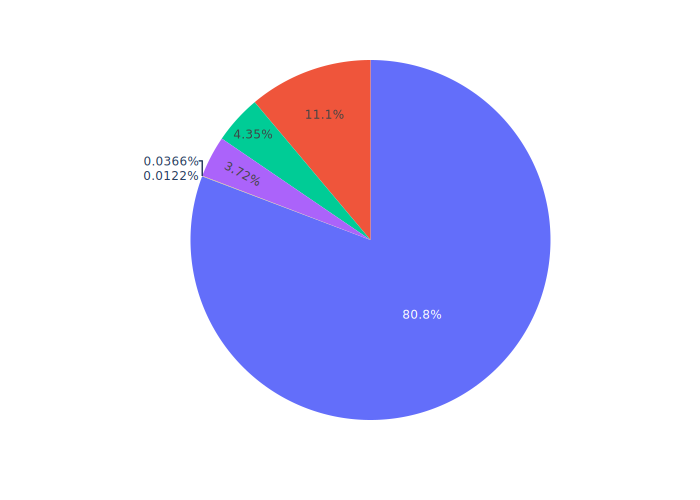

In [19]:
# 각 이용 등급별 발생 횟수 파이차트로 만들기 
fig = px.pie(labels=ratings.index, values=ratings.values)
fig.show(renderer="svg")  # github에 올릴 시 plotly가 명시되지 않음, 동적인 차트라 그런데, 이것을 정적으로 바꿔주는 옵션 

- 파이차트를 만들려면 "px.pie()"를 호출한 다음 ".show()"의 결과를 표시하면 된다. 꺾은 선형 차트, 막대 차트, 원형 차트 등 모든 그림을 graph_object로 나타낸다.

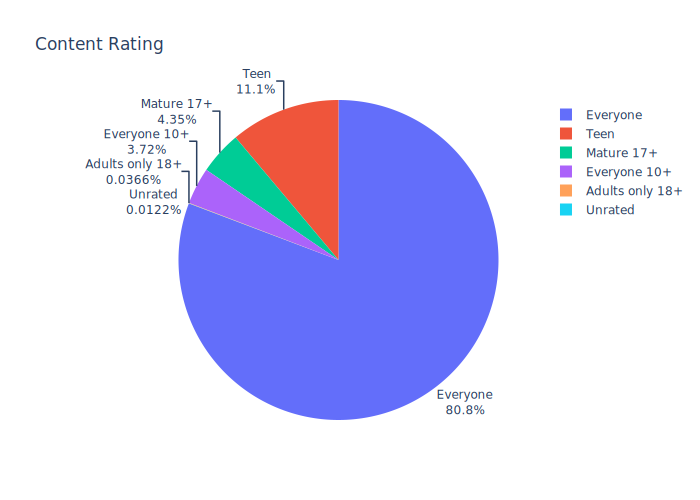

In [20]:
# 파이차트에서 추가사항 추가하기 
fig = px.pie(labels=ratings.index, values=ratings.values, title="Content Rating", names=ratings.index)   #제목, 범주 명칭 설정 
fig.update_traces(textposition='outside', textinfo='percent+label')      # 파이차트 내 text 설정 - 레이블 위치와 표기 설정 등

fig.show(renderer='svg')

- 파이 차트를 조금더 꾸며보았다([파이차트 문서](https://plotly.com/python-api-reference/generated/plotly.express.pie.html) 참조). 제목이나 이름 같이 설정할 수 있는 여러 매개변수를 확인할 수 있다. 
- 매개 변수 목록에서 볼 수 없는 차트의 다른 부분을 구성하려면, ".update_trace()" 메소드를 호출하면 된다. plotly 언어에서, "trace"는 그림의 그래픽 표시를 나타낸다. "trace"를 어떤 속성의 집합이라고 생각하면 된다. 

#### 3-3. 도넛 차트 만들기

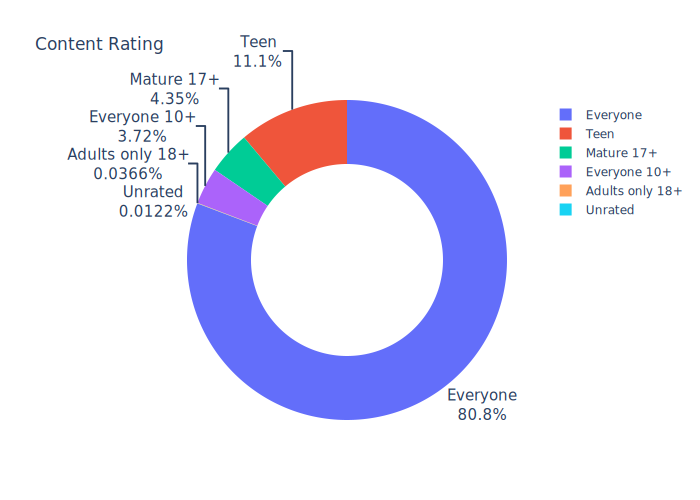

In [21]:
# 도넛 차트 만들기 
fig = px.pie(labels=ratings.index, values=ratings.values, title="Content Rating", names=ratings.index, hole=0.6)   #제목, 범주 명칭 설정 + 파이차트를 위한 hole 인자 추가
fig.update_traces(textposition='outside', textfont_size=15, textinfo='percent+label')            # 파이차트 내 text 설정 - 레이블 위치와 표기 설정 등

fig.show(renderer='svg')

- 도넛 차트를 만들려면, 값에 "hole"인자만 추가해주면 된다.

### 4. 설치 및 가격 데이터의 숫자 형식 변환하기 

#### 4-1. 데이터 전처리 - 문자열 숫자를 정수형 혹은 실수형으로 변환하기 

In [22]:
# Install 데이터 타입 확인
df_apps_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8199 entries, 0 to 8198
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8199 non-null   object 
 1   Category        8199 non-null   object 
 2   Rating          8199 non-null   float64
 3   Reviews         8199 non-null   int64  
 4   Size_MBs        8199 non-null   float64
 5   Installs        8199 non-null   object 
 6   Type            8199 non-null   object 
 7   Price           8199 non-null   object 
 8   Content_Rating  8199 non-null   object 
 9   Genres          8199 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 640.7+ KB


In [23]:
# 숫자가 string인 데이터들 확인 
df_apps_clean[['App', 'Installs']].groupby('Installs').count()

,App
Installs,
1,3
"1,000",698
"1,000,000",1417
"1,000,000,000",20
10,69
"10,000",988
"10,000,000",933
100,303
"100,000",1096


In [24]:
# 쉼표를 빈 문자열로 바꾸기
df_apps_clean.Installs = df_apps_clean.Installs.astype(str).str.replace(",", "")
df_apps_clean.tail()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
8194,Google Drive,PRODUCTIVITY,4.4,2731171,4.00,1000000000,Free,0,Everyone,Productivity
8195,YouTube,VIDEO_PLAYERS,4.3,25655305,4.65,1000000000,Free,0,Teen,Video Players & Editors
8196,Google Play Movies & TV,VIDEO_PLAYERS,3.7,906384,4.65,1000000000,Free,0,Teen,Video Players & Editors
8197,Google News,NEWS_AND_MAGAZINES,3.9,877635,13.00,1000000000,Free,0,Teen,News & Magazines
8198,Subway Surfers,GAME,4.5,27722264,76.00,1000000000,Free,0,Everyone 10+,Arcade


In [25]:
# 바뀐 문자열을 ".to_numeric()" 메소드를 이용하여 정수형으로 바꾸기 
df_apps_clean.Installs = pd.to_numeric(df_apps_clean.Installs)
df_apps_clean.tail()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
8194,Google Drive,PRODUCTIVITY,4.4,2731171,4.00,1000000000,Free,0,Everyone,Productivity
8195,YouTube,VIDEO_PLAYERS,4.3,25655305,4.65,1000000000,Free,0,Teen,Video Players & Editors
8196,Google Play Movies & TV,VIDEO_PLAYERS,3.7,906384,4.65,1000000000,Free,0,Teen,Video Players & Editors
8197,Google News,NEWS_AND_MAGAZINES,3.9,877635,13.00,1000000000,Free,0,Teen,News & Magazines
8198,Subway Surfers,GAME,4.5,27722264,76.00,1000000000,Free,0,Everyone 10+,Arcade


In [26]:
# 데이터 타입 확인
df_apps_clean.Installs.info()

<class 'pandas.core.series.Series'>
RangeIndex: 8199 entries, 0 to 8198
Series name: Installs
Non-Null Count  Dtype
--------------  -----
8199 non-null   int64
dtypes: int64(1)
memory usage: 64.2 KB


In [27]:
# 가격 데이터 중 어떤 것을 replace 해야하는지 확인하기 위해 유료앱 목록만 추출 
df_apps_clean[df_apps_clean.Type != "Free"]

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
1,Ra Ga Ba,GAME,5.0,2,20.000000,1,Paid,$1.49,Everyone,Arcade
2,Mu.F.O.,GAME,5.0,2,16.000000,1,Paid,$0.99,Everyone,Arcade
26,Chess of Blades (BL/Yaoi Game) (No VA),FAMILY,4.8,4,23.000000,10,Paid,$14.99,Teen,Casual
31,The DG Buddy,BUSINESS,3.7,3,11.000000,10,Paid,$2.49,Everyone,Business
36,AC DC Power Monitor,LIFESTYLE,5.0,1,1.200000,10,Paid,$3.04,Everyone,Lifestyle
...,...,...,...,...,...,...,...,...,...,...
6174,League of Stickman 2018- Ninja Arena PVP(Dream...,GAME,4.4,32496,99.000000,1000000,Paid,$0.99,Teen,Action
6194,Sleep as Android Unlock,LIFESTYLE,4.5,23966,0.851562,1000000,Paid,$5.99,Everyone,Lifestyle
6205,Where's My Water?,FAMILY,4.7,188740,69.000000,1000000,Paid,$1.99,Everyone,Puzzle;Brain Games
6871,Hitman Sniper,GAME,4.6,408292,29.000000,10000000,Paid,$0.99,Mature 17+,Action


In [28]:
# 달러표시를 빈 문자열로 바꾸기
df_apps_clean.Price = df_apps_clean.Price.astype(str).str.replace("$", "")
df_apps_clean

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
0,KBA-EZ Health Guide,MEDICAL,5.0,4,25.00,1,Free,0,Everyone,Medical
1,Ra Ga Ba,GAME,5.0,2,20.00,1,Paid,1.49,Everyone,Arcade
2,Mu.F.O.,GAME,5.0,2,16.00,1,Paid,0.99,Everyone,Arcade
3,Brick Breaker BR,GAME,5.0,7,19.00,5,Free,0,Everyone,Arcade
4,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5.0,1,4.60,5,Free,0,Everyone,Medical
...,...,...,...,...,...,...,...,...,...,...
8194,Google Drive,PRODUCTIVITY,4.4,2731171,4.00,1000000000,Free,0,Everyone,Productivity
8195,YouTube,VIDEO_PLAYERS,4.3,25655305,4.65,1000000000,Free,0,Teen,Video Players & Editors
8196,Google Play Movies & TV,VIDEO_PLAYERS,3.7,906384,4.65,1000000000,Free,0,Teen,Video Players & Editors
8197,Google News,NEWS_AND_MAGAZINES,3.9,877635,13.00,1000000000,Free,0,Teen,News & Magazines


In [29]:
# 바뀐 문자열을 ".to_numeric()" 메소드를 이용하여 정수형으로 바꾸기 
df_apps_clean.Price = pd.to_numeric(df_apps_clean.Price)
df_apps_clean.head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
0,KBA-EZ Health Guide,MEDICAL,5.0,4,25.0,1,Free,0.00,Everyone,Medical
1,Ra Ga Ba,GAME,5.0,2,20.0,1,Paid,1.49,Everyone,Arcade
2,Mu.F.O.,GAME,5.0,2,16.0,1,Paid,0.99,Everyone,Arcade
3,Brick Breaker BR,GAME,5.0,7,19.0,5,Free,0.00,Everyone,Arcade
4,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5.0,1,4.6,5,Free,0.00,Everyone,Medical


In [30]:
# 데이터 타입 확인
df_apps_clean.Price.info()

<class 'pandas.core.series.Series'>
RangeIndex: 8199 entries, 0 to 8198
Series name: Price
Non-Null Count  Dtype  
--------------  -----  
8199 non-null   float64
dtypes: float64(1)
memory usage: 64.2 KB


- 먼저 Install 컬럼의 데이터 형태를 바꿔야 한다. Install 컬럼을 살펴보면 int 타입이 아닌 str 타입임을 알 수 있다. 왜냐하면 형식이 '1,000,000'으로 쉼표가 들어간 데이터들이 있기 때문이다. 
- 이럴 때 "replace()" 메소드를 이용하여 데이터프레임에서 쉼표, 또는 다른 문자열을 제거할 수 있다.
- 여기서는 쉼표를 빈 문자열로 바꾸고, 바뀐 문자열을 ".to_numeric()" 메소드를 이용하여 정수형으로 바꿨다.
- Price의 경우도 replace 해야할 것을 확인하기 위해 유료앱 만 필터링 해서 보았더니 달러 표시가 있었다. 해당 것도 위와 동일한 방식으로 바꿔주었다.

#### 4-2. 가비지 데이터 삭제 -  앱 가격이 250불 이상인 데이터 필터링 후 삭제 

In [31]:
# 가격이 250불 이상 앱들 필터링
df_apps_clean[df_apps_clean.Price >= 250]
# df_apps_clean.sort_values('Price', ascending=False).head(20)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
370,most expensive app (H),FAMILY,4.3,6,1.500000,100,Paid,399.99,Everyone,Entertainment
753,I am rich (Most expensive app),FINANCE,4.1,129,2.700000,1000,Paid,399.99,Teen,Finance
944,I am extremely Rich,LIFESTYLE,2.9,41,2.900000,1000,Paid,379.99,Everyone,Lifestyle
1094,I am Rich!,FINANCE,3.8,93,22.000000,1000,Paid,399.99,Everyone,Finance
1143,I AM RICH PRO PLUS,FINANCE,4.0,36,41.000000,1000,Paid,399.99,Everyone,Finance
1396,I Am Rich Pro,FAMILY,4.4,201,2.700000,5000,Paid,399.99,Everyone,Entertainment
1688,I am Rich,FINANCE,4.3,180,3.800000,5000,Paid,399.99,Everyone,Finance
1719,I am rich(premium),FINANCE,3.5,472,0.942383,5000,Paid,399.99,Everyone,Finance
1793,I am Rich Plus,FAMILY,4.0,856,8.700000,10000,Paid,399.99,Everyone,Entertainment
2101,💎 I'm rich,LIFESTYLE,3.8,718,26.000000,10000,Paid,399.99,Everyone,Lifestyle


- 해당 자료를 바탕으로 구글 플레이 스토어에 15개의 'I am Rich' 앱이 있다. 이것들은 모두 250달러 혹은 그 이상의 가격으로 형셩되어 있다. 
- 2008년으로 거슬러 올라가보면, Armin Heinrich라는 사람이 iOS 앱 스토어에 999.9달러에 첫 번째 'I am Rich'앱을 출시 했다. 해당 앱은 아무것도 하지 않고, 단순히 보석 원석의 사진만을 보여주고 당신이 얼마나 부자인지 친구들에게 증명하는 정도로만 사용하는 앱이다. 
- 애플에 의해 삭제되기 전까지 Armin은 실제로 7개의 앱을 판매했다. 그럼에도 불구하고, 이것은 안드로이드 앱 스토어에 많은 모방범들에게 영감을 주었지만, 현재는 모두 사라졌다. 
- 많은 설치 횟수는 게임일 가능성이 높은데, 이는 앱을 특정 시점에 무료로 받을 수 있고 리뷰를 더 많이 받아 더 합법적으로 보일 수 있게 하기 때문이다. 

<img src="data/armin_heinrich.png">

- 이렇게 잘못된 데이터를 데이터셋에 남겨두면, 가장 비싼 ‘실제’ 앱에 대한 분석이 잘못될 수 있다. 이런 가비지 데이터들을 제거해줘야 한다. 

In [32]:
# 250달러 이상 판매되는 어플 목록 삭제하기 
df_apps_clean = df_apps_clean[df_apps_clean.Price < 250]
df_apps_clean

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
0,KBA-EZ Health Guide,MEDICAL,5.0,4,25.00,1,Free,0.00,Everyone,Medical
1,Ra Ga Ba,GAME,5.0,2,20.00,1,Paid,1.49,Everyone,Arcade
2,Mu.F.O.,GAME,5.0,2,16.00,1,Paid,0.99,Everyone,Arcade
3,Brick Breaker BR,GAME,5.0,7,19.00,5,Free,0.00,Everyone,Arcade
4,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5.0,1,4.60,5,Free,0.00,Everyone,Medical
...,...,...,...,...,...,...,...,...,...,...
8194,Google Drive,PRODUCTIVITY,4.4,2731171,4.00,1000000000,Free,0.00,Everyone,Productivity
8195,YouTube,VIDEO_PLAYERS,4.3,25655305,4.65,1000000000,Free,0.00,Teen,Video Players & Editors
8196,Google Play Movies & TV,VIDEO_PLAYERS,3.7,906384,4.65,1000000000,Free,0.00,Teen,Video Players & Editors
8197,Google News,NEWS_AND_MAGAZINES,3.9,877635,13.00,1000000000,Free,0.00,Teen,News & Magazines


In [33]:
# 발견된 I am Rich앱 삭제 
df_apps_clean = df_apps_clean[df_apps_clean.App != "I am Rich Person"]
df_apps_clean

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
0,KBA-EZ Health Guide,MEDICAL,5.0,4,25.00,1,Free,0.00,Everyone,Medical
1,Ra Ga Ba,GAME,5.0,2,20.00,1,Paid,1.49,Everyone,Arcade
2,Mu.F.O.,GAME,5.0,2,16.00,1,Paid,0.99,Everyone,Arcade
3,Brick Breaker BR,GAME,5.0,7,19.00,5,Free,0.00,Everyone,Arcade
4,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5.0,1,4.60,5,Free,0.00,Everyone,Medical
...,...,...,...,...,...,...,...,...,...,...
8194,Google Drive,PRODUCTIVITY,4.4,2731171,4.00,1000000000,Free,0.00,Everyone,Productivity
8195,YouTube,VIDEO_PLAYERS,4.3,25655305,4.65,1000000000,Free,0.00,Teen,Video Players & Editors
8196,Google Play Movies & TV,VIDEO_PLAYERS,3.7,906384,4.65,1000000000,Free,0.00,Teen,Video Players & Editors
8197,Google News,NEWS_AND_MAGAZINES,3.9,877635,13.00,1000000000,Free,0.00,Teen,News & Magazines


In [34]:
# 상위 5개앱 살펴보기 
df_apps_clean.sort_values('Price', ascending=False).head(5)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
1012,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32.0,1000,Paid,79.99,Everyone,Medical
408,LTC AS Legal,MEDICAL,4.0,6,1.3,100,Paid,39.99,Everyone,Medical
1158,A Manual of Acupuncture,MEDICAL,3.5,214,68.0,1000,Paid,33.99,Everyone,Medical
71,AP Art History Flashcards,FAMILY,5.0,1,96.0,10,Paid,29.99,Mature 17+,Education
2770,Golfshot Plus: Golf GPS,SPORTS,4.1,3387,25.0,50000,Paid,29.99,Everyone,Sports


- 해당 가비지 데이터를 삭제하고, 가격 기준 상위 5개의 앱들을 다시 살펴보았다. 3가지가 의료 목적의 앱이라는 것을 알 수 있다.

#### 4-3. 수익 추정치 계산해서 새로운 컬럼에 추가 

In [35]:
# 수입 추정치 계산해서 저장
df_apps_clean['Revenue_Estimate'] = df_apps_clean.Installs.mul(df_apps_clean.Price)
df_apps_clean.sort_values('Revenue_Estimate', ascending=False)[:10]

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Revenue_Estimate
7142,Minecraft,FAMILY,4.5,2376564,19.000000,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,69900000.0
6871,Hitman Sniper,GAME,4.6,408292,29.000000,10000000,Paid,0.99,Mature 17+,Action,9900000.0
5439,Grand Theft Auto: San Andreas,GAME,4.4,348962,26.000000,1000000,Paid,6.99,Mature 17+,Action,6990000.0
5736,Facetune - For Free,PHOTOGRAPHY,4.4,49553,48.000000,1000000,Paid,5.99,Everyone,Photography,5990000.0
6194,Sleep as Android Unlock,LIFESTYLE,4.5,23966,0.851562,1000000,Paid,5.99,Everyone,Lifestyle,5990000.0
4941,DraStic DS Emulator,GAME,4.6,87766,12.000000,1000000,Paid,4.99,Everyone,Action,4990000.0
4472,Weather Live,WEATHER,4.5,76593,4.750000,500000,Paid,5.99,Everyone,Weather,2995000.0
6171,Bloons TD 5,FAMILY,4.6,190086,94.000000,1000000,Paid,2.99,Everyone,Strategy,2990000.0
5340,Tasker,TOOLS,4.6,43045,3.400000,1000000,Paid,2.99,Everyone,Tools,2990000.0
5179,Threema,COMMUNICATION,4.5,51110,3.500000,1000000,Paid,2.99,Everyone,Communication,2990000.0


- 가바지 데이터가 삭제되고 이제 가장 높은 수익을 올리는 유료 앱을 찾을 수 있게 되었다. 
- 앱 설치수에 앱 가격을 곱한 뒤 추정치 결과를 'Revenue_Estimate' 컬럼을 생성하고 저장 해준다.

- 앱스토어에서는 항상 프로모션과 무료 증정 행사가 있으므로, 모든 설치가 정가 판매로 이루어졌을 거란 가정은 가능성이 낮다.
- 계산 결과 가장 높은 수익을 올린 유료 앱은 약 7천만 달러의 수익을 올린 "마인트래프트"이다. 
- 흥미로운 점은 Bloons, Card wars와 함께 마인크래프트의 카테고리가 게임이 아닌 패밀리에 있다는 것이다. 
- 또한 상위 10개 앱 중 7개가 게임이라는 것을 알 수 있다. (구글 플레이 스토어의 카테고리 정책이 너무 유연한 것 같다)